In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv("/content/drive/MyDrive/ML Studies/df_valid.csv")
df

,Unnamed: 0,id,anchor,target,context,score,context_grp_1,text_grp_1,text,score_map,fold,pred
0,0,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,A,HUMAN NECESSITIES,A[SEP]abatement[SEP]forest regionSEP,0,0,0.001300
1,1,ef2d4c2e6bbb208d,abatement,mixing core materials,A47,0.25,A,HUMAN NECESSITIES,A[SEP]abatement[SEP]mixing core materialsSEP,1,0,0.164885
2,2,4c3f2750e7540ab7,abatement,multi pollution abatement device,A47,0.50,A,HUMAN NECESSITIES,A[SEP]abatement[SEP]multi pollution abatement ...,2,0,0.501689
3,3,bfd7270f57530991,abatement,pollution abatement,A47,0.50,A,HUMAN NECESSITIES,A[SEP]abatement[SEP]pollution abatementSEP,2,0,0.504240
4,4,cc96541d4987b399,abatement,rent abatement,A47,0.00,A,HUMAN NECESSITIES,A[SEP]abatement[SEP]rent abatementSEP,0,0,0.219177
...,...,...,...,...,...,...,...,...,...,...,...,...
36468,36468,ede41dd2a61bb0a9,wood article,substrate,B44,0.25,B,PERFORMING OPERATIONS; TRANSPORTING,B[SEP]wood article[SEP]substrateSEP,1,3,0.289886
36469,36469,4f366b6369dbfbf2,wood article,timber article,B44,0.75,B,PERFORMING OPERATIONS; TRANSPORTING,B[SEP]wood article[SEP]timber articleSEP,3,3,0.815685
36470,36470,51421420985d5c93,wood article,wood,B44,0.50,B,PERFORMING OPERATIONS; TRANSPORTING,B[SEP]wood article[SEP]woodSEP,2,3,0.577281
36471,36471,8ceaa2b5c2d56250,wood article,wood article,B44,1.00,B,PERFORMING OPERATIONS; TRANSPORTING,B[SEP]wood article[SEP]wood articleSEP,4,3,0.997972


In [13]:
# assume cateforical

df_categorical = df.copy()
df_categorical["pred"] = np.round(df["pred"]*4)/4

df_categorical["score"] = df_categorical["score"].astype(str)
df_categorical["pred"] = df_categorical["pred"].astype(str)

In [24]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(df_categorical["score"], df_categorical["pred"], labels=sorted(df_categorical["score"].unique()))
conf = pd.DataFrame(conf)
conf

,0,1,2,3,4
0,5543,1408,476,41,3
1,790,8205,2386,134,4
2,225,1871,8442,1705,57
3,30,115,1167,2504,213
4,0,0,18,96,1040


Text(33.0, 0.5, 'pred')

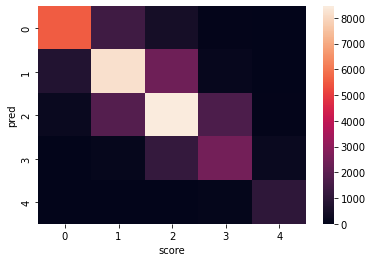

In [27]:
plt.figure()
sns.heatmap(conf)
plt.xlabel("score")
plt.ylabel("pred")

In [33]:
print("Correlation coefficient: ")
df[["score", "pred"]].corr().iloc[0][1]

Correlation coefficient: 


0.8398198099649856